Exploratory Data Analysis


In [4]:
import pandas as pd
from collections import Counter
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import regex as re
import numpy as np

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ugoch\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ugoch\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ugoch\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [3]:
pip install pandas seaborn nltk beautifulsoup4 regex matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:

#Import the MID.xlsx dataset
df = pd.read_excel("MID.xlsx")

In [10]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [11]:
#First 5 records
df.head()

,Name,Link,Contains,ProductIntroduction,ProductUses,ProductBenefits,SideEffect,HowToUse,HowWorks,QuickTips,SafetyAdvice,Chemical_Class,Habit_Forming,Therapeutic_Class,Action_Class
0,Andol 0.5mg Tablet,https://www.1mg.com/drugs/andol-0.5mg-tablet-6...,Haloperidol (0.5mg),Andol 0.5mg Tablet can also be used for treati...,"\n \n \nul \""\""\n\n \n 0\n\n \n Schiz...",\n \n Schizophrenia \n \n Schizophrenia is ...,Most side effects do not require any medical a...,Take this medicine in the dose and duration as...,Andol 0.5mg Tablet is a typical antipsychotic....,\n \n Andol 0.5mg Tablet helps treat schizop...,"\nAlcohol\n,\nAndol 0.5mg Tablet may cause exc...",Butyrophenone Derivative,No,NEURO CNS,Typical Antipsychotic
1,Avastin 100mg Injection,https://www.1mg.com/drugs/avastin-100mg-inject...,Bevacizumab (100mg),"\np dir=\""ltr\"" style=\""line-height: 1.38; mar...","\n \n \nul \""\""\n\n \n 0\n\n \n Cance...",\n \n Cancer of colon and rectum \n \n Canc...,Most side effects do not require any medical a...,Your doctor or nurse will give you this medici...,Avastin 100mg Injection is a anti-angiogenic m...,\n \n Avastin 100mg Injection is an effectiv...,"\nAlcohol\n,\nIt is not known whether it is sa...",Monoclonal antibody (mAb),No,ANTI NEOPLASTICS,Vascular endothelial growth factor (VEGF) in...
2,Actorise 40 Injection,https://www.1mg.com/drugs/actorise-40-injectio...,Darbepoetin alfa (40mcg),Actorise 40 Injection is a medicine that needs...,"\n \n \nul \""\""\n\n \n 0\n\n \n Treat...",\n \n Treatment of Anemia due to chronic kid...,Most side effects do not require any medical a...,Your doctor or nurse will give you this medici...,Actorise 40 Injection is an erythropoiesis-sti...,\n \n Actorise 40 Injection helps in the tre...,"\nAlcohol\n,\nIt is not known whether it is sa...","Amino Acids, Peptides Analogues",No,BLOOD RELATED,Erythropoiesis-stimulating agent (ESA
3,Actorise 25 Injection,https://www.1mg.com/drugs/actorise-25-injectio...,Darbepoetin alfa (25mcg),Actorise 25 Injection is a medicine that needs...,"\n \n \nul \""\""\n\n \n 0\n\n \n Treat...",\n \n Treatment of Anemia due to chronic kid...,Most side effects do not require any medical a...,Your doctor or nurse will give you this medici...,Actorise 25 Injection is an erythropoiesis-sti...,\n \n Actorise 25 Injection helps in the tre...,"\nAlcohol\n,\nIt is not known whether it is sa...","Amino Acids, Peptides Analogues",No,BLOOD RELATED,Erythropoiesis-stimulating agent (ESA
4,Actorise 60 Injection,https://www.1mg.com/drugs/actorise-60-injectio...,Darbepoetin alfa (60mcg),Actorise 60 Injection is a medicine that needs...,"\n \n \nul \""\""\n\n \n 0\n\n \n Treat...",\n \n Treatment of Anemia due to chronic kid...,Most side effects do not require any medical a...,Your doctor or nurse will give you this medici...,Actorise 60 Injection is an erythropoiesis-sti...,\n \n Actorise 60 Injection helps in the tre...,"\nAlcohol\n,\nIt is not known whether it is sa...","Amino Acids, Peptides Analogues",No,BLOOD RELATED,Erythropoiesis-stimulating agent (ESA


Exploratory Data Analysis

In [ ]:
df.shape

(192807, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192807 entries, 0 to 192806
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Name                 192807 non-null  object
 1   Link                 192807 non-null  object
 2   Contains             192807 non-null  object
 3   ProductIntroduction  180821 non-null  object
 4   ProductUses          192807 non-null  object
 5   ProductBenefits      192807 non-null  object
 6   SideEffect           192807 non-null  object
 7   HowToUse             192712 non-null  object
 8   HowWorks             192571 non-null  object
 9   QuickTips            192807 non-null  object
 10  SafetyAdvice         192807 non-null  object
 11  Chemical_Class       101473 non-null  object
 12  Habit_Forming        192807 non-null  object
 13  Therapeutic_Class    192807 non-null  object
 14  Action_Class         85690 non-null   object
dtypes: object(15)
memory usage: 22.1+ 

In [10]:
df.describe(include= "all")

,Name,Link,Contains,ProductIntroduction,ProductUses,ProductBenefits,SideEffect,HowToUse,HowWorks,QuickTips,SafetyAdvice,Chemical_Class,Habit_Forming,Therapeutic_Class,Action_Class
count,192807,192807,192807,180821,192807,192807,192807,192712,192571,192807,192807,101473,192807,192807,85690
unique,147872,151007,11940,136893,1147,144479,121482,120713,145994,137470,147857,869,4,44,405
top,NS 0.9% Infusion,https://www.1mg.com/drugs/pamidria-30mg-inject...,Pantoprazole (40mg),Give this medicine to your child an hour befor...,"\n \n \nul \""\""\n\n \n 0\n\n \n Treat...","efits"":null",""":null",Your doctor or nurse will give you this medici...,Montelukast is a leukotriene antagonist. It wo...,:null,\n,Fluoroquinolone,No,ANTI INFECTIVES,Cephalosporins 3 generatio
freq,12,5,2205,506,19283,2994,3558,17018,676,1463,229,4805,188428,20291,5888


In [ ]:
#Check for  % of null values
df.isnull().sum()/df.shape[0] *100


,0
Name,0.000000
Link,0.000000
Contains,0.000000
ProductIntroduction,6.216579
ProductUses,0.000000
ProductBenefits,0.000000
SideEffect,0.000000
HowToUse,0.049272
HowWorks,0.122402
QuickTips,0.000000


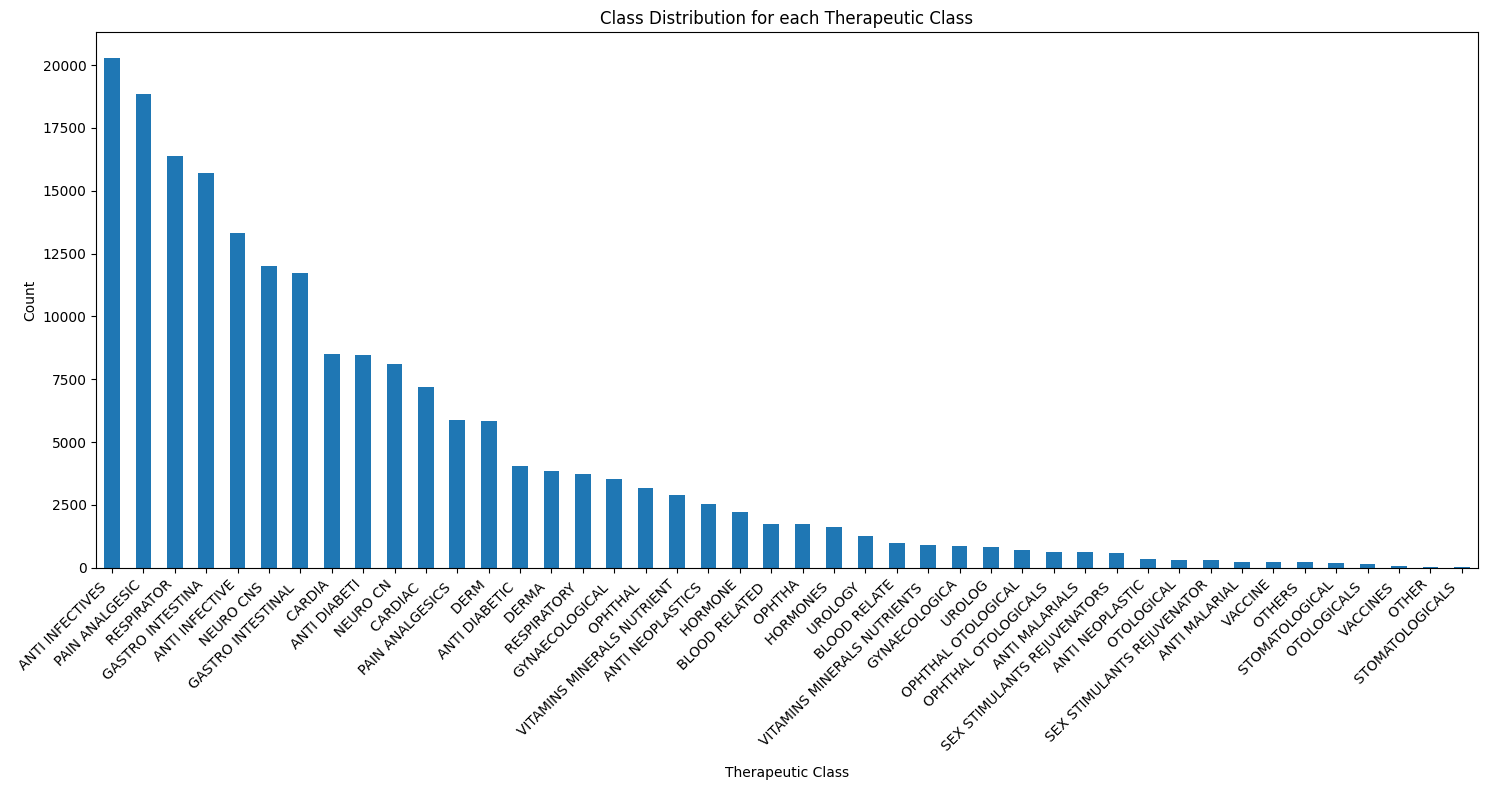

In [14]:
#Class Distribution for each Therapuetic Class
plt.figure(figsize=(15, 8))
df['Therapeutic_Class'].value_counts().plot(kind="bar")
plt.title('Class Distribution for each Therapeutic Class')
plt.xlabel('Therapeutic Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#check how many Action_Classes we have
df["Action_Class"].nunique()

405

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 [Text(0, 0.0, '0'),
  Text(0, 1000.0, '1000'),
  Text(0, 2000.0, '2000'),
  Text(0, 3000.0, '3000'),
  Text(0, 4000.0, '4000'),
  Text(0, 5000.0, '5000'),
  Text(0, 6000.0, '6000'),
  Text(0, 7000.0, '7000')])

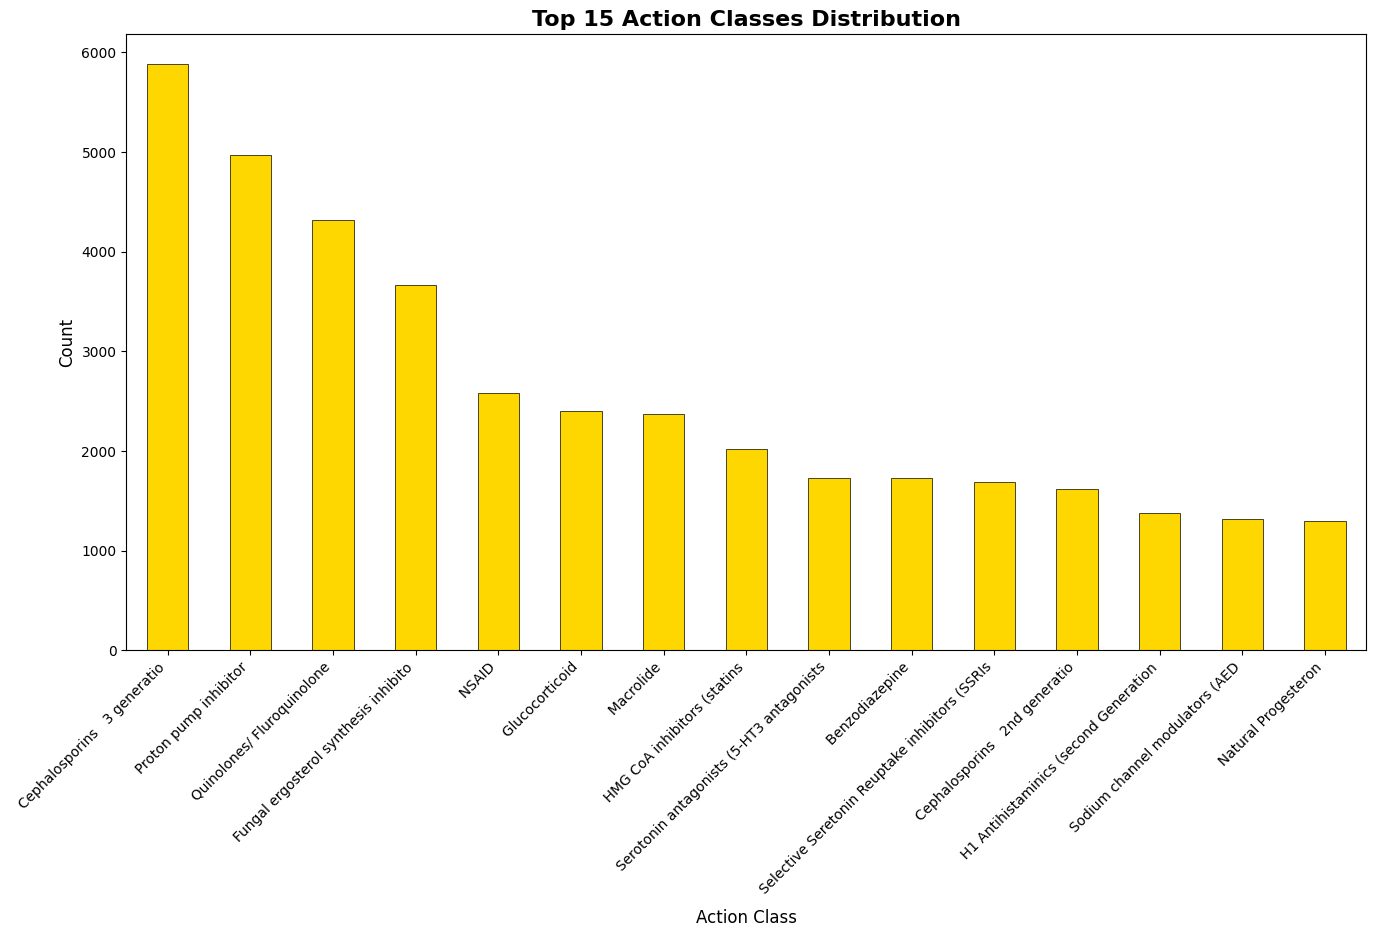

In [18]:
top_n = 15  # Adjust this number as needed
plt.figure(figsize=(16, 8))
top_actions = df['Action_Class'].value_counts().head(top_n)
ax = top_actions.plot(kind="bar", color='gold', edgecolor='black', linewidth=0.5)

plt.title(f'Top {top_n} Action Classes Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Action Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

Find most common Words in ProductIntroduction

In [ ]:
# Combine all text into a single string
all_text = ' '.join(df["ProductIntroduction"].fillna('').astype(str).values)

# Convert to lowercase
all_text = all_text.lower()

# Remove punctuation
translator = str.maketrans('', '', string.punctuation)
all_text = all_text.translate(translator)

# Tokenize
tokens = word_tokenize(all_text)

# Remove stopwords (like "and", "is", "the", etc.)
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words and word.isalpha()]


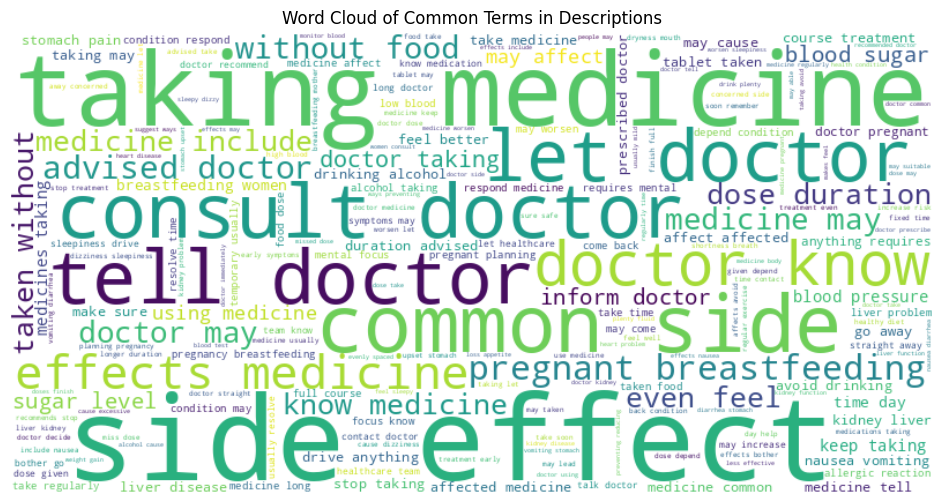

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Common Terms in Descriptions")
plt.show()


/tmp/ipython-input-22-2150585600.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freq), y=list(word), palette="magma")


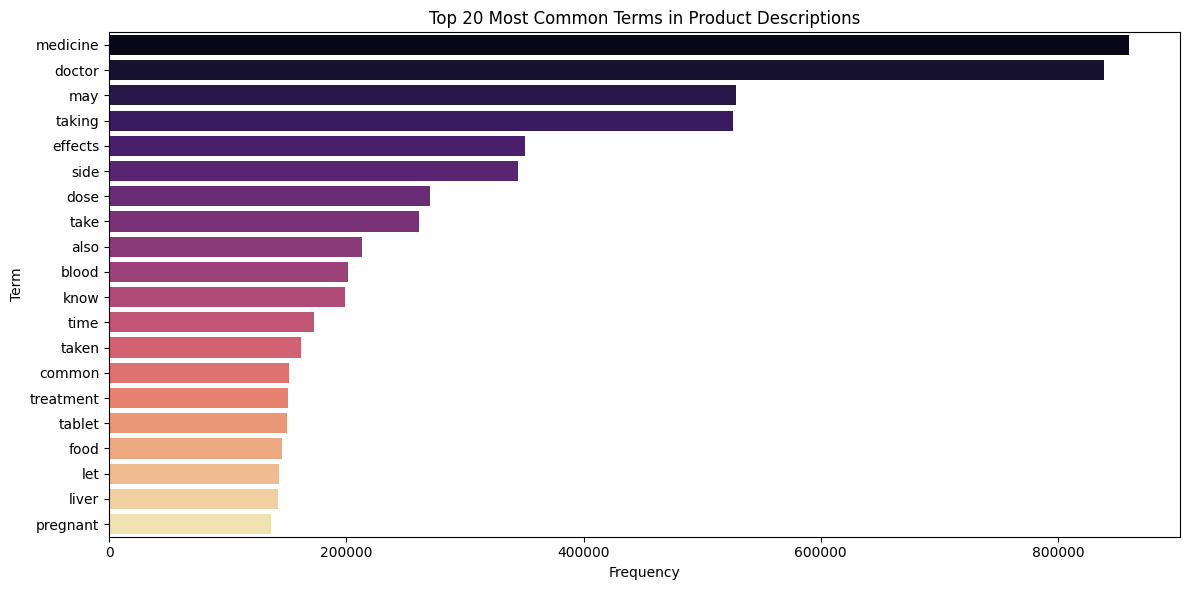

In [ ]:
# Count word frequencies
word_counts = Counter(tokens).most_common(20)
word, freq = zip(*word_counts)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(freq), y=list(word), palette="magma")
plt.title("Top 20 Most Common Terms in Product Descriptions")
plt.xlabel("Frequency")
plt.ylabel("Term")
plt.tight_layout()
plt.show()

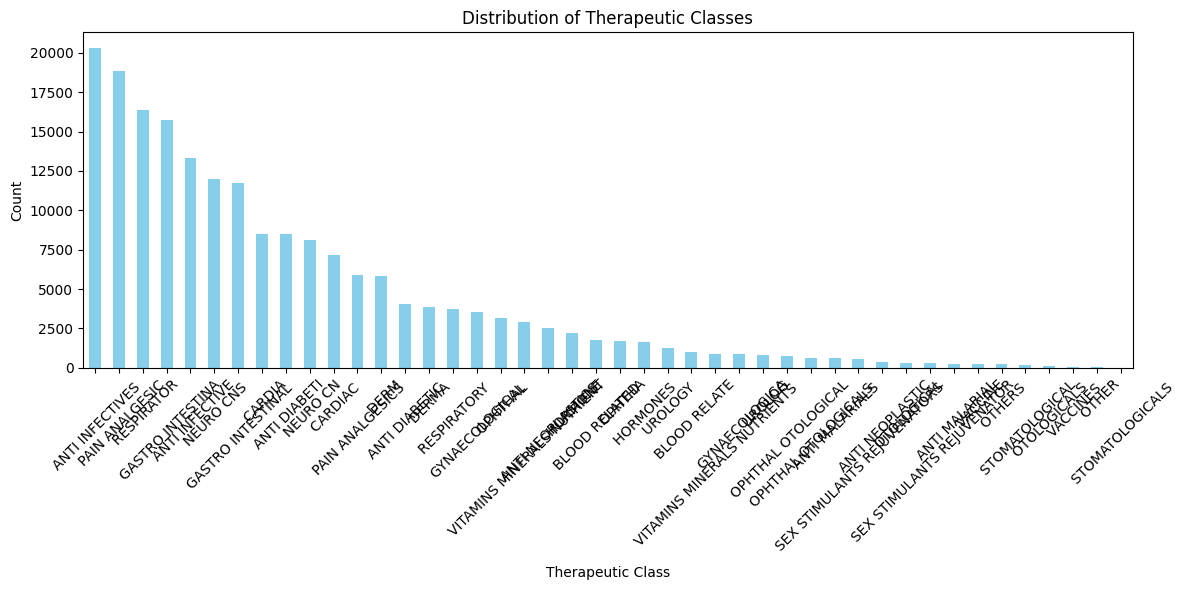

In [13]:
#Class Distribution for each Therapeutic Class
df['Therapeutic_Class'].value_counts().plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Distribution of Therapeutic Classes')
plt.xlabel('Therapeutic Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()